C:\Users\WSN-LINK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized confusion matrix
Confusion matrix, without normalization
Classes of LogReg(PDR+RSSI):  ['Bad' 'Good']


C:\Users\WSN-LINK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Normalized confusion matrix
Confusion matrix, without normalization
Classes of SVM(PDR+RSSI):  ['Bad' 'Good']


C:\Users\WSN-LINK\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Normalized confusion matrix
Confusion matrix, without normalization
Classes of LSVM(PDR+RSSI):  ['Bad' 'Good']
Normalized confusion matrix
Confusion matrix, without normalization
Classes of RF(PDR+RSSI):  ['Bad' 'Good']


C:\Users\WSN-LINK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\WSN-LINK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Normalized confusion matrix
Confusion matrix, without normalization
Classes of LogReg(PDR):  ['Intermediate' 'Good' 'Bad']


C:\Users\WSN-LINK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Normalized confusion matrix
Confusion matrix, without normalization
Classes of SVM(PDR):  ['Intermediate' 'Good' 'Bad']
Normalized confusion matrix
Confusion matrix, without normalization
Classes of LSVM(PDR):  ['Intermediate' 'Good' 'Bad']
Normalized confusion matrix
Confusion matrix, without normalization
Classes of RF(PDR):  ['Intermediate' 'Good' 'Bad']
You don't have enought classes to use this prediction method
Number of classes:  1
Classes:  ['Bad']
You don't have enought classes to use this prediction method
Number of classes:  1
Classes:  ['Bad']
You don't have enought classes to use this prediction method
Number of classes:  1
Classes:  ['Bad']
You don't have enought classes to use this prediction method
Number of classes:  1
Classes:  ['Bad']


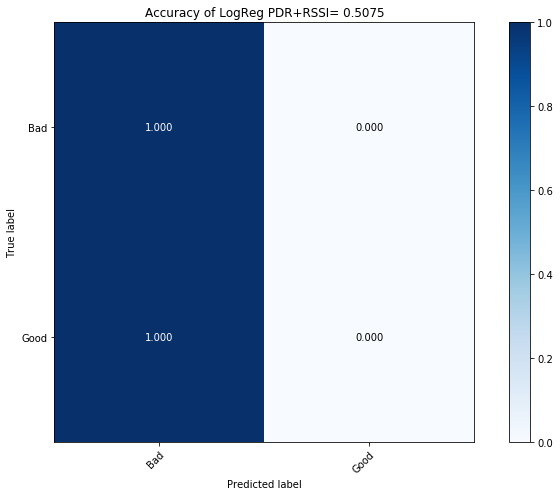

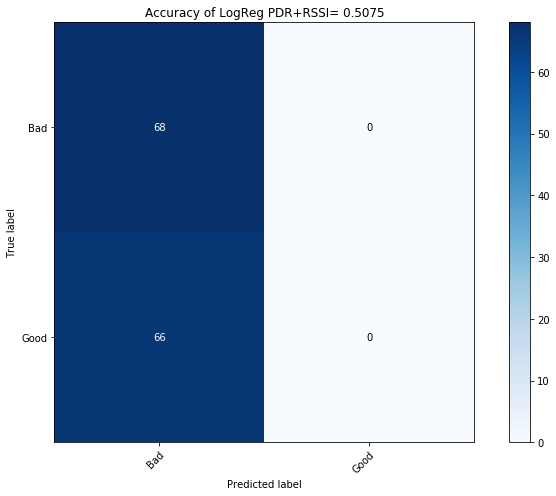

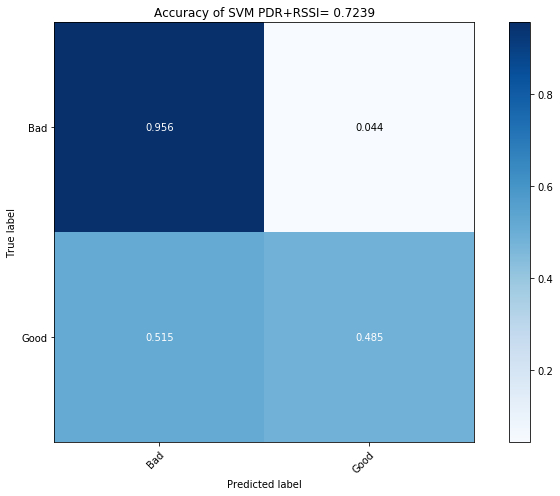

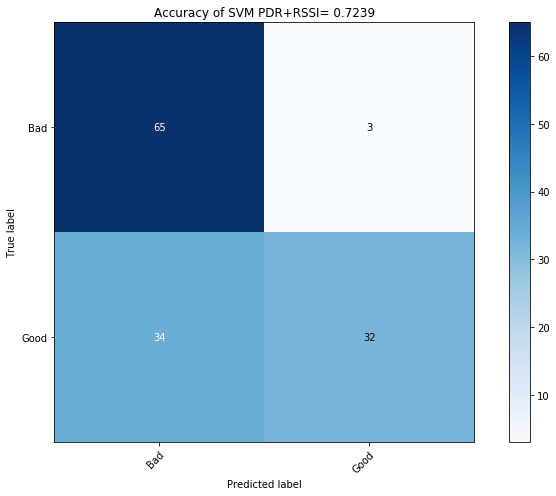

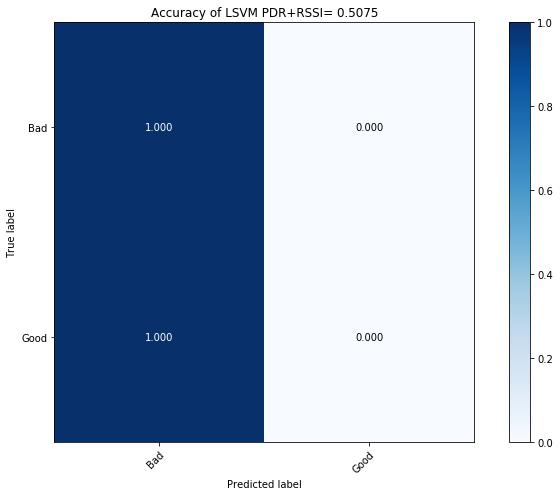

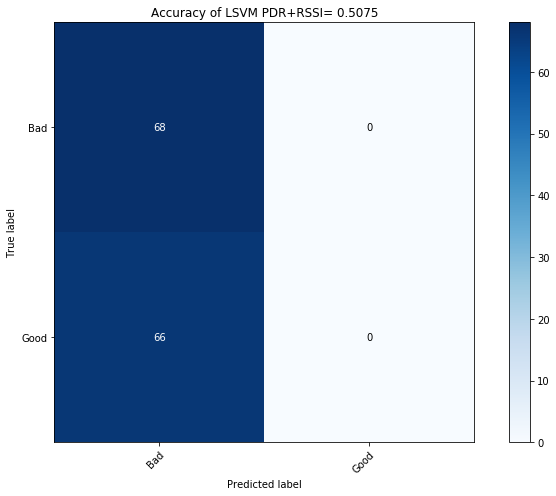

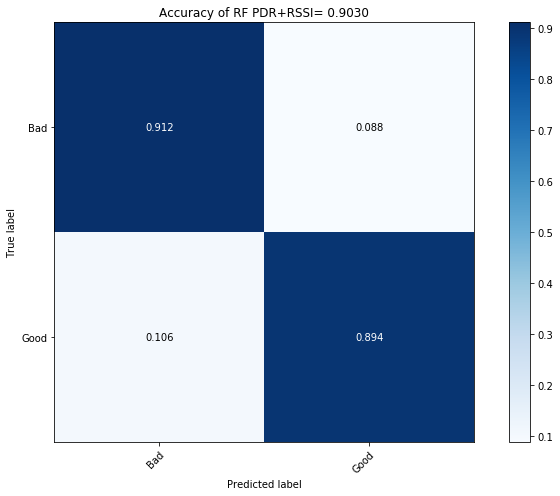

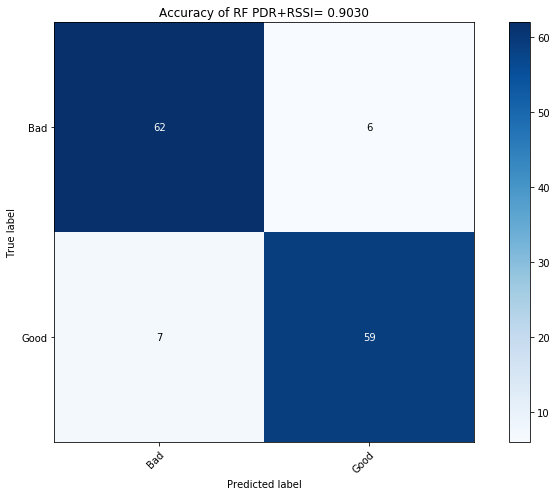

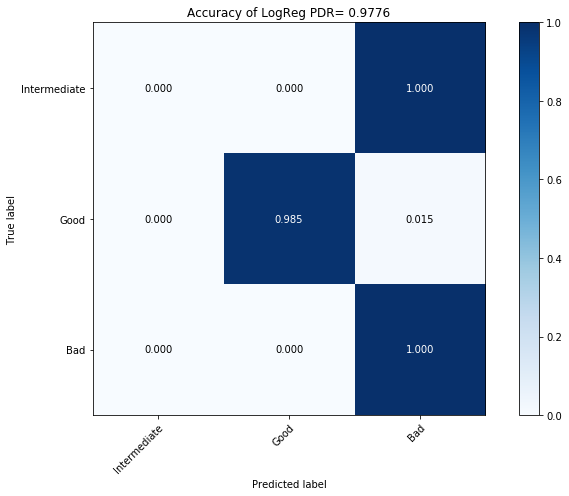

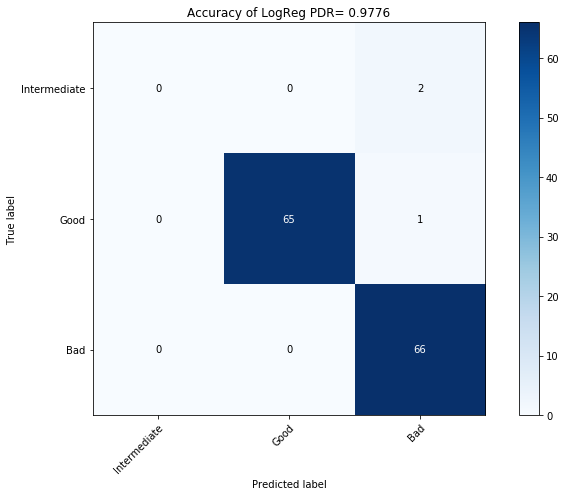

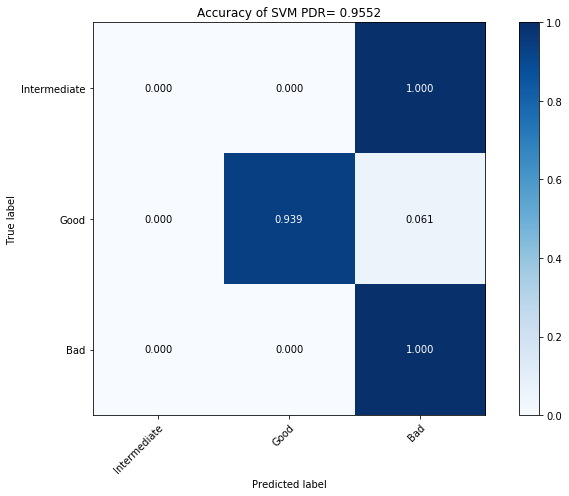

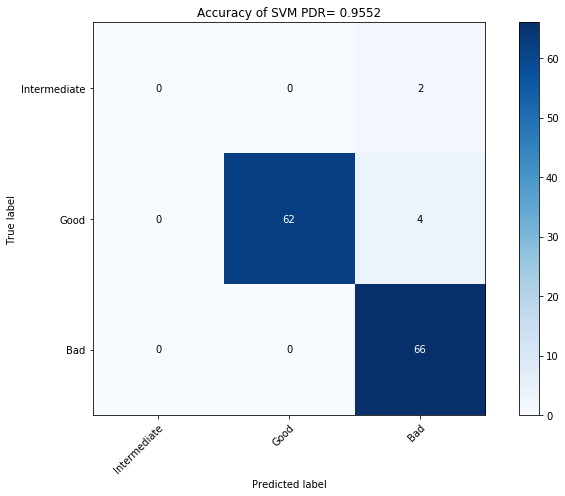

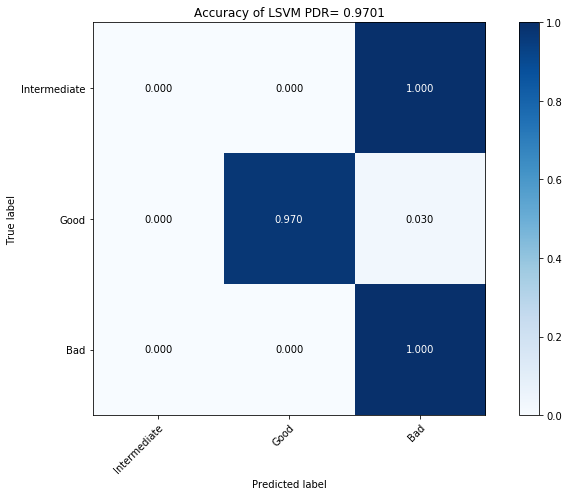

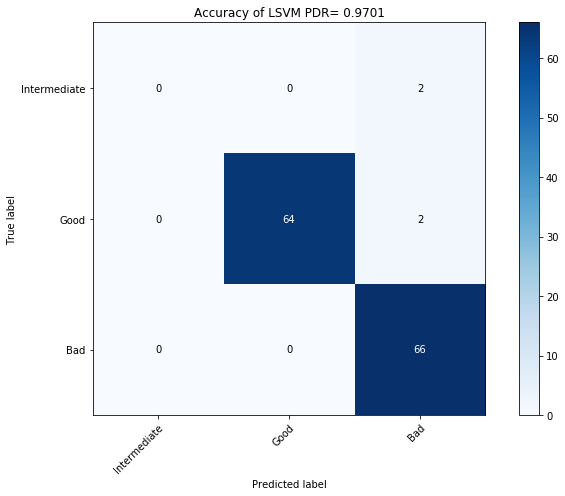

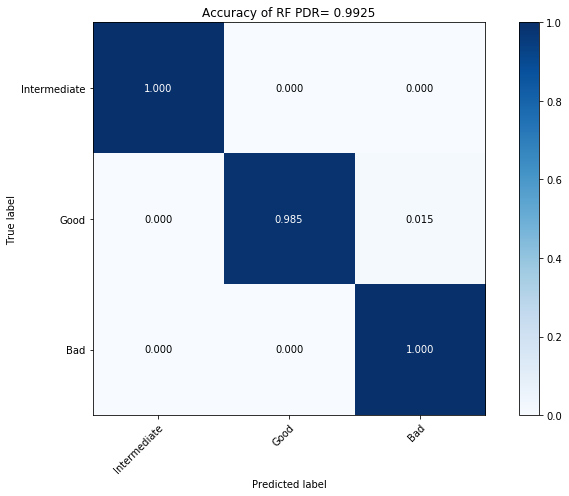

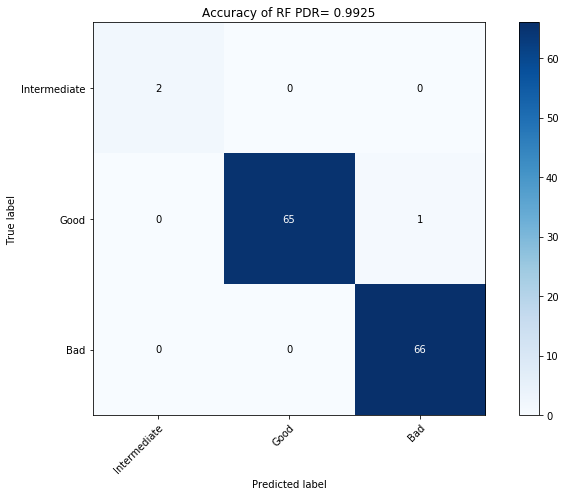

In [47]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
pd.options.display.max_rows=10
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
import xgboost
import graphviz
import matplotlib.dates as md
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import scipy
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 7
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#rcParams['figure.figsize']=5,4
#sb.set_style('whitegrid')

import numpy as np
df = pd.read_table("grenoble_7.k7",sep = ',',header = 0)
class_names=['Bad','Intermediate','Good']
#print(type(df))
#print(df.shape)#Affiche le nombre de ligne et le nombre de colonne de mon fichier
#test=df.head(15)#Affiche les premières lignes du fichier (les ( premières))
#print(df.columns)#Affiche toutes les colonnes du fichier(leur nom)
#print(df.dtypes)#Affiche les noms des colones et leurs types
#print(df.info())#Affiche les informations complémentaires sur chacun des champs (nombre d'occurence, type, ...)
#test=df['mean_rssi'].describe()#Affiche les éléments de la statistique descriptive de la colonne donnée 
#test=df['datetime'].sort_values()#Permet de trier les données sélectionnées
#test=df.iloc[0:10,:]#Affiche les 10 première lignes de mon fichier
#test=df.iloc[0:10,[0,3,4,5]]#Affiche les colonnes 0, 3, 4 ert 5 des 10 premières lignes de mes données
#test=df.loc[df['src']==0,:]#Affiche uniquement les lignes où le src=0
#test=df.loc[(df['src']==0)&(df['channel']==11),:]//Affiche uniquement les lignes dont src=0 et channel=11
#colonne=['datetime', 'src', 'dst', 'channel', 'mean_rssi', 'pdr']
#test=df.loc[(df['src']==0)&(df['channel']==11),colonne]#Affiche les ligne dont src=0 et channel=11. N'affiche que les colonnes mentionnées dans le tableau "colonne"
#df.hist(column='mean_rssi')#Trace l'histogramme de la colonne "mean_rssi"
#df['mean_rssi'].plot.kde()#Permet de tracer la courbe des densité sur mean_rssi
#df.hist(column='mean_rssi',by='channel')#Trace l'histogramme de lean_rssi en fonction de channel
#test = pd.date_range(start='1/1/2018', end='1/12/2018', freq='D')

#df['datetime'] = pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')#Convertie les données de la colone 'datetime' en type date
#df=df.set_index('datetime')
#df.hist(column='mean_rssi',by='datetime')
target_count=df.channel.value_counts()

labels = df.columns[5]

X = df[labels]
y = df['pdr']

def val_prediction_pdr(df):
    ret=list()
    for i in range(len(df)):
        if df['pdr'][i] < 0.02:
            ret.append(0.5)
        elif df['pdr'][i] >= 0.02 and df['pdr'][i] < 0.25:
            ret.append(df['pdr'][i])
        elif df['pdr'][i] >= 0.25 and df['pdr'][i] < 0.3:
            ret.append(0.9)
        elif df['pdr'][i] >= 0.3 and df['pdr'][i] <= 0.35:
            ret.append(0.1)
        elif df['pdr'][i] > 0.35 and df['pdr'][i] <= 0.73:
            ret.append(df['pdr'][i])
        elif df['pdr'][i] >= 0.73 and df['pdr'][i] <= 0.75:
            ret.append(0.9)
        elif df['pdr'][i] > 0.75 and df['pdr'][i] <= 0.8:
            ret.append(0.1)
        elif df['pdr'][i] > 0.8 and df['pdr'][i] < 0.85:
            ret.append(0.5)
        else:
            ret.append(df['pdr'][i])
    #print(ret)
    return ret

 

def logistic_regression_init(df):
    ros = RandomOverSampler(random_state=0)
    rus = RandomUnderSampler(random_state=0)
    y_true=list()
    y_pred=list()
    target=list()
    val_pred=val_prediction_pdr(df)
    for i in range(len(df)):
        if df['pdr'][i] < 0.3:
            target.append(0)
        elif df['pdr'][i] > 0.75:
            target.append(2)
        else:
            target.append(1)
        
        if val_pred[i] < 0.3:
            y_pred.append(0)
        elif val_pred[i] > 0.75:
            y_pred.append(2)
        else:
            y_pred.append(1)
    df['target']=target
    df['pred']=y_pred
    y=df['pred']
    mydata=df.ix[:,(5,7)].values
    pdr=df['pdr']
    target=df['target']
    spearmanr_coefficient,p_value=spearmanr(pdr,target)
    #print(' Spearmanr Rank Correlation %0.3f' %(spearmanr_coefficient))
    X=scale(mydata)
    LogReg=LogisticRegression()
    LogReg.fit(X,y)
    print (LogReg.score(X,y))
    y_pred=LogReg.predict(X)
    from sklearn.metrics import classification_report
    print(classification_report(y,y_pred))
    

def arma(df, classes, normalize=False, title=None,cmap=plt.cm.Blues):
    ros = RandomOverSampler(random_state=0)
    rus = RandomUnderSampler(random_state=0)
    y_true=list()
    y_pred=list()
    target=list()
    val_pred=val_prediction_pdr(df)
    for i in range(len(df)):
        if df['pdr'][i] < 0.3:
            target.append(0)
        elif df['pdr'][i] > 0.75:
            target.append(2)
        else:
            target.append(1)
        
        if val_pred[i] < 0.3:
            y_pred.append(0)
        elif val_pred[i] > 0.75:
            y_pred.append(2)
        else:
            y_pred.append(1)
    df['target']=target
    df['pred']=y_pred
    mydata=df.ix[:,(5,7)].values#Column 5 corresponds to the value of PDR and column 7 to the value representing that valu in class(BadnGood and Intermediate)
    X=scale(mydata)
    y=df['pred']
    X_resampled, y_resampled = ros.fit_resample(X, y)
    
    my_y=df['target']
    arma = ARMA(my_y,order=[4,4])
    
    res=arma.fit(trend="nc")
    params=res.params
    residuals = res.resid
    p = res.k_ar
    q = res.k_ma
    k_exog = res.k_exog
    k_trend = res.k_trend
    steps = 1
    
    y_pred=arma.predict(params)
    
    print('y_pred:  ==>', y_pred)
    
    print ('Accuracy ARMA: ',arma.score(y_pred))
    #print (arma.predict(y))
    #y_pred=arma.predict(X)
    from sklearn.metrics import classification_report
    
def plot_ar4(df):
    df=df.set_index('datetime')
    ts=df['pdr']
    ts_log = np.log(ts)
    ts_log_diff = ts_log - ts_log.shift()
    model=ARIMA(ts_log,order=(2,1,0))
    results_AR=model.fit(disp=-1)
    plt.plot(ts_log_diff)
    plt.plot(results_AR.fittedvalues,color='red')
    plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
    plt.savefig("ARMA\AR.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()
        
def plot_ma(df):
    df=df.set_index('datetime')
    ts=df['pdr']
    ts_log = np.log(ts)
    ts_log_diff = ts_log - ts_log.shift()
    model=ARIMA(ts_log,order=(0,1,2))
    results_MA=model.fit(disp=-1)
    plt.plot(ts_log_diff)
    plt.plot(results_MA.fittedvalues,color='red')
    plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
    plt.savefig("ARMA\MA.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()
    
def plot_arima(df):
    df=df.set_index('datetime')
    ts=df['pdr']
    ts_log = np.log(ts)
    ts_log_diff = ts_log - ts_log.shift()
    model=ARIMA(ts_log,order=(1,0,1))
    results_MA=model.fit(disp=-1)
    plt.plot(ts_log_diff)
    plt.plot(results_MA.fittedvalues,color='red')
    plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
    plt.savefig("C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\PDR\\ARIMA.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()

    
def plot_arma(df):
    df=df.set_index('datetime')
    df.index=pd.to_datetime(df.index)
    
    ts=df['pdr']
    results = adfuller(ts.values, autolag='AIC')
    print("Result[1]===> ",results[1])
    if results[1]<=0.05:
        print("Reject Null hypothesis, the series are stationary")
    else:
        print("Do not reject Null, the series are not stationary")
    
    model=ARMA(ts,order=(1,1))
    res=model.fit(disp=-1)
    plt.plot(ts)
    plt.plot(res.fittedvalues,color='red')
    #plt.title('RSS: %.4f'% sum((res.fittedvalues-ts_log_diff)**2))
    plt.savefig("ARMA\ARMA1_1.png", format='png', bbox_inches='tight', pad_inches=0)
    res= res.predict()

    
    #plt.ylabel('Baysian Information Criterion')
    #plt.plot(res)
    #plt.show()
    print("According to Baysian Information criteria, we can use (ARMA(3,0) model)")
    print ("min: ",ts.index.min())
    print ("max: ",ts.index.max())
    
def plot_test(df):
    df=df.set_index('datetime')
    df.index=pd.to_datetime(df.index)
    df.index = df.index.to_period('H')
    #dep = df[["channel","pdr"]].groupby("channel", as_index=True).mean()
    nb=df.index.unique()
    print("Nb de date= ",len(nb))
    ts=df['pdr']
    print(ts)

    
def plot_test2(df):
    df=df.set_index('datetime')
    df.index=pd.to_datetime(df.index)
    
    ts=df.loc[(df['channel']==11)]
    ts=ts['pdr']
    print(len(ts))
    plt.plot(ts)
    results = adfuller(ts.values, autolag='AIC')
    print("Result[1]===> ",results[1])
    if results[1]<=0.05:
        print("Reject Null hypothesis, the series are stationary")
    else:
        print("Do not reject Null, the series are not stationary")
    
    model=ARMA(ts,order=(1,1))
    model_fit=model.fit(disp=0)
    print(model_fit.summary())
    plt.plot(ts)
    pred=model_fit.forecast()
    plt.plot(pred[0],color='blue')
    plt.title('ARMA(1,1) On channel ',11,' With accuracy: ')
    plt.savefig("ARMA\ARMA_Chanel11_1_1.png", format='png', bbox_inches='tight', pad_inches=0)
    

def stationarity(ts,seuil):
    tsa=np.exp(ts)
    rolmean=tsa.rolling(window=1).mean()
    rolstd=tsa.rolling(1).std()
    
    print('rolling_mean: ',rolmean)
    #print('rolstd_mean: ',rolstd)
    
    ts1=ts-rolmean
    ts1.dropna(inplace=True)
    plt.plot(ts1,color='black')
    
    ts2=ts-rolstd
    ts2.dropna(inplace=True)
    plt.plot(ts2,color='yellow')
    
    plt.plot(ts,color='red')
    results = adfuller(ts2, autolag='AIC')
    print('ADF Statistic: ', results[0])
    print('P-Value: ',results[1])
    print('Critical values: ')
    for key,value in results[4].items():
        print('\t ',key,': %.3f'%(value))

        
def channel_in_a_link(df,src,dst):
    df['datetime'] = pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')
    df=df.set_index('datetime')
    color_list = ["blue", "red"]
    
    
    ts=df.loc[(df['src']==src)&((df['dst']==dst))]
    #ts=ts.loc[((ts['src']==src)&(ts['dst']==dst))|((ts['src']==dst)&(ts['dst']==src))]
    #ts=ts.loc[(ts['src']==src)&(ts['dst']==dst)]
    for link, df_link in ts.groupby(["src"]):
        #dep = df_link[["channel","pdr"]].groupby("datetime", as_index=True).mean()
        #dep = df_link[["channel","mean_rssi"]].groupby("datetime", as_index=True).mean()
        #print(dep)
        for ln,ln1 in df_link.groupby("channel"):
            #print(ln1)
            plt.plot(ln1.index, 0.95*ln1.mean_rssi / 100 + ln,
            #plt.plot(ln1.index, 0.8 * ln1.pdr + ln,
                          '-', zorder=1, markersize=2,
                          color=color_list[ln%len(color_list)])
        #print(ln1.channel)
        day1_start = pd.to_datetime("2018-01-11 22:00:00.000")
        day1_stop = pd.to_datetime("2018-01-12 06:00:00.000")
        plt.fill_between([day1_start, day1_stop], 0, 30, color='#d5dbdb', alpha=0.5, zorder=1)

        day2_start = pd.to_datetime("2018-01-12 22:00:00.000")
        day2_stop = pd.to_datetime("2018-01-13 06:00:00.000")
        plt.fill_between([day2_start, day2_stop], 0, 30, color='#d5dbdb', alpha=0.5, zorder=1)

        #day3_start = pd.to_datetime("2018-01-13 20:00:00.000")
        #day3_stop = pd.to_datetime("2018-01-13 06:00:00.000")
        #plt.fill_between([day3_start, day3_stop], 0, 30, color='#d5dbdb', alpha=0.5, zorder=1)

        plt.xlabel('Time')
        #plt.ylabel('PDR (%) per IEEE802.15.4 Channel')
        plt.ylabel('Average RSSI (dBm) per IEEE802.15.4 Channel')
        plt.ylim([10, 27])
        plt.yticks(df.channel.unique())
        #plt.xticks(df.index.unique())
        plt.grid(True)
        #xfmt = md.DateFormatter('%H:%M:%s')
        #xfmt = md.DateFormatter('%M:%S')
        xfmt = md.DateFormatter('%Y-%m-%d %H')
        ax = plt.gca()
        ax.xaxis.set_major_formatter(xfmt)
        plt.gcf().autofmt_xdate()
        #title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\PDR\\"+str(src)+"==="+str(dst)+".png"
        title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\RSSI\\"+str(src)+"==="+str(dst)+".png"
        #plt.savefig("time_pdr\pdr_time_per_channel_{0}.png".format(link), format='png', bbox_inches='tight', pad_inches=0)
        plt.savefig(title, format='png', bbox_inches='tight', pad_inches=0)
        plt.clf()

def general_channel_in_link(df):
    node_list=df["src"].unique()
    for i in node_list:
        for j in node_list:
            if i!=j:
                channel_in_a_link(df,i,j)
        
def spaguetti_plot_pdr(df,channel):
    df=df.set_index('datetime')
    df.index=pd.to_datetime(df.index)
    ts=df['pdr']
    #ts=df['mean_rssi']
    
    channel_list=df["channel"].unique()
    ts=df.loc[(df['channel']==channel)]
    plt.plot(ts,color='red')
    plt.ylim(0, 1)
    #plt.ylim(-100, 0)

    #plt.xlabel('PDR')
    plt.xlabel('Time')
    #plt.ylabel('MEAN RSSI')
    plt.ylabel('PDR')
    plt.title('PDR spaguetti plot by channel')
    plt.grid(True)

    #plt.show()
    title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\PDR\\PDR_spaguethiPlot.png"
    #title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\RSSI\\RSSI_spaguethiPlot.png"
    plt.savefig(title, format='png', bbox_inches='tight', pad_inches=0)
    #plt.savefig("PDR_BY_RSSI.png", format='png', bbox_inches='tight', pad_inches=0)
    plt.clf()

    
def min_max(df):
    mini=list()
    maxi=list()
    channel_list=df["channel"].unique()
    for i in channel_list:
        ts=df.loc[(df['channel']==i)]
        mini.append(min(ts['pdr'])*1)
        maxi.append(max(ts['pdr'])*1)
        
    print('Mini:===>',mini)
    print("Maxi:===>",maxi)
    print('channel_List:==>',channel_list)
    plt.hist(mini)
    #plt.hist([mini, maxi], bins = channel_list, color = ['yellow', 'green'],
    #            edgecolor = 'red', hatch = '/', label = ['Mini', 'Maxi'],
    #            histtype = 'bar')
    plt.ylabel('valeurs')
    plt.xlabel('Channel')
    plt.title('2 series superposees')
    plt.legend()
    return channel_list,mini,maxi
    

    
def studies(df,src,dst):
    #df=df.set_index('datetime')
    df=df.loc[((df['src']==src)&(df['dst']==dst))]
    taille=list()
    #print("src=",src," dst=",dst," Taille=",len(df))
    if len(df)>0:
        for i in range(len(df)):
            k=i+1
            taille.append(k)
        df['taille']=taille
        df=df.set_index('taille')

        #ts=df['pdr']
        ts=df['mean_rssi']

        #rolmean=ts.rolling(500).mean()
        rolmean=ts.rolling(window=16).mean()
        rolstd=ts.rolling(16).std()
        print('Rolmean:====>',rolmean.dropna(inplace=False))
        print('Rolstd:====>',rolstd.dropna(inplace=False))
        
        from statsmodels.tsa.seasonal import seasonal_decompose
        result = seasonal_decompose(rolstd.dropna(inplace=False), model='additive', freq=16)
        result.plot()
        
        #2Plot rolling statistics
        #orig=plt.plot(ts,color='blue',label='Original')
        #print(ts)
        mean=plt.plot(rolmean,color='red',label='Rolling Mean')
        #std=plt.plot(rolstd,color='black',label='Rolling Std')
        plt.legend(loc='best')
        #title1='Time Series PDR '+str(src)+"==>"+str(dst)
        title1='Time Series RSSI '+str(src)+"==>"+str(dst)
        plt.title(title1)
        #plt.show(block=False)
        #title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\PDR\\PDR_TS_LINK_"+str(src)+"==="+str(dst)+".png"
        title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\RSSI\\RSSI_TS_LINK_"+str(src)+"==="+str(dst)+".png"
        
        plt.savefig(title, format='png', bbox_inches='tight', pad_inches=0)
        plt.clf()
    
def studies_autocorre(df,src,dst):
    #df=df.set_index('datetime')
    df=df.loc[((df['src']==src)&(df['dst']==dst))]
    taille=list()
    #print("src=",src," dst=",dst," Taille=",len(df))
    if len(df)>0:
        for i in range(len(df)):
            k=i+1
            taille.append(k)
        df['taille']=taille
        df=df.set_index('taille')

        #ts=df['pdr']
        ts=df['mean_rssi']
        plt.acorr(ts)
        plt.legend(loc='best')
        plt.xlabel('Lag')

        plt.ylabel('Autocorrelation')
        #title1='Time Series PDR '+str(src)+"==>"+str(dst)
        title1='Time Series RSSI '+str(src)+"==>"+str(dst)
        plt.title(title1)
        #title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\PDR\\PDR_AUTO_LINK_"+str(src)+"==="+str(dst)+".png"
        title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\RSSI\\RSSI_AUTO_LINK_"+str(src)+"==="+str(dst)+".png"
        plt.savefig(title, format='png', bbox_inches='tight', pad_inches=0)
        plt.clf()
def plot_acfi(df,src,dst):
    df=df.loc[((df['src']==src)&(df['dst']==dst))]
    taille=list()
    #print("src=",src," dst=",dst," Taille=",len(df))
    if len(df)>0:
        #df=df.loc[:,['datetime','pdr']]
        df=df.loc[:,['datetime','mean_rssi']]
        df=df.set_index('datetime')
        ts=df
        plot_acf(ts, lags=16)
        #title1='Autocorrelation PDR '+str(src)+"==>"+str(dst)
        title1='Autocorrelation  RSSI '+str(src)+"==>"+str(dst)
        plt.title(title1)
        #title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\PDR\\PDR_ACF_LINK_"+str(src)+"==="+str(dst)+".png"
        title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\RSSI\\RSSI_ACF_LINK_"+str(src)+"==="+str(dst)+".png"
        
        plt.savefig(title, format='png', bbox_inches='tight', pad_inches=0)
        plt.clf()
        
def plot_pacfi(df,src,dst):
    df=df.loc[((df['src']==src)&(df['dst']==dst))]
    taille=list()
    #print("src=",src," dst=",dst," Taille=",len(df))
    if len(df)>0:
        #df=df.loc[:,['datetime','pdr']]
        df=df.loc[:,['datetime','mean_rssi']]
        df=df.set_index('datetime')
        ts=df
        plot_pacf(ts, lags=16)
        #title1='Partial Autocorrelation PDR '+str(src)+"==>"+str(dst)
        title1='Partial Autocorrelation  RSSI '+str(src)+"==>"+str(dst)
        plt.title(title1)
        #title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\PDR\\PDR_PACF_LINK_"+str(src)+"==="+str(dst)+".png"
        title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\RSSI\\RSSI_PACF_LINK_"+str(src)+"==="+str(dst)+".png"
        plt.savefig(title, format='png', bbox_inches='tight', pad_inches=0)
        plt.clf()
        
def plot_seasonality(df,src,dst):
    df=df.loc[((df['src']==src)&(df['dst']==dst))]
    taille=list()
    #print("src=",src," dst=",dst," Taille=",len(df))
    if len(df)>0:
        #df=df.loc[:,['datetime','pdr']]
        df=df.loc[:,['datetime','mean_rssi']]
        df=df.set_index('datetime')
        ts=df
        from statsmodels.tsa.seasonal import seasonal_decompose
        result = seasonal_decompose(ts, model='additive', freq=16)
        result.plot()
        title1='Seasonality PDR '+str(src)+"==>"+str(dst)
        #title1='Seasonality  RSSI '+str(src)+"==>"+str(dst)
        plt.title(title1)
        
        #title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\PDR\\PDR_SEASONALITY_LINK_"+str(src)+"==="+str(dst)+".png"
        title="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\RSSI\\RSSI_SEASONALITY_LINK_"+str(src)+"==="+str(dst)+".png"
        plt.savefig(title, format='png', bbox_inches='tight', pad_inches=0)
        plt.clf()
        

        
def general_time_series(df):
    node_list=df["src"].unique()
    for i in node_list:
        for j in node_list:
            if i!=j:
                studies(df,i,j)
                
def general_autocorre(df):
    node_list=df["src"].unique()
    for i in node_list:
        for j in node_list:
            if i!=j:
                studies_autocorre(df,i,j)
                
def general_acf(df):
    node_list=df["src"].unique()
    for i in node_list:
        for j in node_list:
            if i!=j:
                plot_acfi(df,i,j)
            
            
def general_pacf(df):
    node_list=df["src"].unique()
    for i in node_list:
        for j in node_list:
            if i!=j:
                plot_pacfi(df,i,j)
                
def general_seasonality(df):
    node_list=df["src"].unique()
    for i in node_list:
        for j in node_list:
            if i!=j:
                plot_seasonality(df,i,j)

def puissant_arma(df,src,dst):
    df=df.loc[((df['src']==src)&(df['dst']==dst))]
    df=df.set_index('datetime')
    df.index=pd.to_datetime(df.index)
    print(df)
    #ts=df.loc[(df['channel']==11)]
    ts=df['pdr']
    
    print(ts)
    size=int(len(ts)*0.66)
    train, test=ts[0:size],ts[size:len(ts)]
    history=[x for x in train]
    predictions=list()
    
    
    for t in range(len(test)):
        model=ARMA(history,order=(2,1))
        model_fit=model.fit(disp=0)
        output=model_fit.forecast()
        yhat=output[0]
        predictions.append(yhat)
        obs=test[t]
        history.append(obs)
        print('predicted: ', yhat,' and expected= ',obs)
    
    #r21 = r2_score(test,predictions)
    #mse1=mean_squared_error(test,predictions)
    #rmse1 = np.sqrt(mse1) 
   
    #print('R-Square is: ',r21,'\n')
    #print('MSE is: ',mse1,'\n')
    #print('RMSE is: ',rmse1) 
    
    #plt.plot(test)
    #ts['predictions']=predictions
    #plt.plot(ts['predictions'],color='red')
    #plt.show()
def val_prediction_pdr(df):
    ret=list()
    for i in range(len(df)):
        if df['pdr'][i] < 0.02:
            ret.append(0.5)
        elif df['pdr'][i] >= 0.02 and df['pdr'][i] < 0.25:
            ret.append(df['pdr'][i])
        elif df['pdr'][i] >= 0.25 and df['pdr'][i] < 0.3:
            ret.append(0.9)
        elif df['pdr'][i] >= 0.3 and df['pdr'][i] <= 0.35:
            ret.append(0.1)
        elif df['pdr'][i] > 0.35 and df['pdr'][i] <= 0.73:
            ret.append(df['pdr'][i])
        elif df['pdr'][i] >= 0.73 and df['pdr'][i] <= 0.75:
            ret.append(0.9)
        elif df['pdr'][i] > 0.75 and df['pdr'][i] <= 0.8:
            ret.append(0.1)
        elif df['pdr'][i] > 0.8 and df['pdr'][i] < 0.85:
            ret.append(0.5)
        else:
            ret.append(df['pdr'][i])
    return ret

def decision_tree_pdr(df,src,dst):
    
    from sklearn import tree
    from sklearn.datasets import load_iris
    #iris=load_iris()    
    #print(iris)
    target=list()
    target_names=list()
    for i in range(len(df)):
        if df['pdr'][i] < 0.3:
            target.append(0)
            target_names.append('Bad')
        elif df['pdr'][i] > 0.75:
            target.append(2)
            target_names.append('Good')
        else:
            target.append(1)
            target_names.append('Intermediate')
    df['target']=target
    df['target_names']=target_names
    sample=val_prediction_pdr(df)
    df['sample']=sample
    #df=df.loc[((df['src']==src)&(df['dst']==dst))]
    #print(df['target'].unique())
    clf=tree.DecisionTreeClassifier(random_state=0)
    colonne=['pdr','mean_rssi','target']
    #test=df.loc[(df['src']==src)&(df['dst']==dst),colonne]
    test=df[['pdr','mean_rssi']]
    clf=clf.fit(test.values,target)
    
    dot_data=tree.export_graphviz(clf,out_file=None,
                                 feature_names=test.columns.values,
                                 class_names=df.target_names.unique(),
                                 filled=True, rounded=True,
                                 special_characters=True)
    graph=graphviz.Source(dot_data)
    graph.render('link1')
    print('Initial: ',test.values)
    print('The predicted class is: ',clf.predict(test.values))
    print('The decision path is: ',clf.decision_path(test.values))
    print('The score is: ',clf.score(test.values,target))
    print('The probabilities of each class is: ',clf.predict_proba(test.values))
    
    #tree.plot_tree(clf.fit(test,df['target']))
    
    
def example(df):
    from sklearn import tree
    from sklearn.datasets import load_iris
    from sklearn.tree.export import export_text
    iris=load_iris()    
    clf=tree.DecisionTreeClassifier()
    clf=clf.fit(iris.data,iris.target)
    print("iris.feature_names==>", iris.feature_names)
    print("iris.target_names==>",iris.target_names)
    dot_data=tree.export_graphviz(clf,out_file=None,
                                 feature_names=iris.feature_names,
                                 class_names=iris.target_names,
                                 filled=True, rounded=True,
                                 special_characters=True)
    graph=graphviz.Source(dot_data)
    graph.render('iris')
    X=iris['data']
    print('X==>',X)
    y=iris['target']
    print(y)
    decision_tree=DecisionTreeClassifier(random_state=0,max_depth=2)
    decision_tree=decision_tree.fit(X,y)
    #r=export_text(decision_tree,feature_names=iris['feature_names'])
    #print(r)
    
#Functions to plot the confusion matrix

def trace_conf_mat(cm, acc,classes, norm, title,cmap=plt.cm.Blues):
    accuracy=acc
    
    if norm:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title+'%.4f' % accuracy,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.3f' if norm else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def plot_confusion_matrix_pdr(df, classes, cm,accuracy, normalize=False, title=None,cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    trace_conf_mat(cm, accuracy,classes, normalize, title,cmap=plt.cm.Blues)
np.set_printoptions(precision=2)

    
#The "my_split" function aims to split the dataset of the link src===>dst considering the test size of "size_of_test",
#That is, the training set size is "1-test_of_size" for our models. This function returns respectively:
# - features: The features' list which correspond to pdr*pdr+mean_rssi*mean_rssi in the case of pdr+rssi splitter
# - labels: Labels corresponding to the previous features
# - classes: different classes contained in the link: Bad, Good or Intermediate
# - train_features: The trainning set used by the model
# - train_labels: The Labels corresponding to the previous training set
# - test_features: The Test set used by the models to predict
# - test_labels: The labels set corresponding to the previous test set

def my_split(df,src,dst,size_of_test,kind):
    target=list()
    target_names=list()
    
    if kind=="all":                                              #it is for pdr+rssi
        combined_features=list()
        for i in range(len(df)):
            combined_features.append(df['pdr'][i]*df['pdr'][i]+df['mean_rssi'][i]*df['mean_rssi'][i])
            if df['pdr'][i] < 0.3:
                target.append(0)
                target_names.append('Bad')
            elif df['pdr'][i]>0.75:
                target.append(2)
                target_names.append('Good')
            elif ((df['pdr'][i]>=0.3 and df['pdr'][i]<=0.75)and df['mean_rssi'][i]<-70):
                target.append(0)
                target_names.append('Bad')
            else:
                target.append(1)
                target_names.append('Intermediate')

        df['combined_features']=combined_features
        colonne=['combined_features']
    elif kind=="pdr":                                            #It is for pdr
        for i in range(len(df)):
            if df['pdr'][i] < 0.3 :
                target.append(0)
                target_names.append('Bad')
            elif df['pdr'][i]>0.75 :
                target.append(2)
                target_names.append('Good')
            else:
                target.append(1)
                target_names.append('Intermediate')
            colonne=['pdr']
    else:                                                          #It is for mean_rssi
        for i in range(len(df)):
            if df['mean_rssi'][i] < -70 :
                target.append(0)
                target_names.append('Bad')
            elif df['mean_rssi'][i]>-40 :
                target.append(2)
                target_names.append('Good')
            else:
                target.append(1)
                target_names.append('Intermediate')
        colonne=['mean_rssi']
    df['target']=target
    df['target_names']=target_names
    colonne2=['target_names']
    ts=df.loc[(df['src']==src)&(df['dst']==dst),colonne]
    ts2=df.loc[(df['src']==src)&(df['dst']==dst),colonne2]
    
    features=ts.values
    labels=ts2['target_names'];
    from sklearn.model_selection import train_test_split
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = size_of_test, random_state=None,shuffle=False)
    classes=labels.unique()
    return features,labels, classes, train_features,train_labels,test_features,test_labels


#Logistic regression Classification
def my_logreg(df,src,dst,size_of_test,kind,path):#Kind can be "pdr", "mean_rssi" or "all"
    features,labels, classes, train_features,train_labels,test_features,test_labels=my_split(df,src,dst,size_of_test,kind)
    nb_classes= len(classes)
    if nb_classes>1:
        text=""
        if kind=="all":
            title=path+"LR\\Log_Reg_CM_ALL "+str(src)+"==="+str(dst)+".png"
            title2=path+"LR\\Log_Reg_CM_Not_Normalized_ALL "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of LogReg PDR+RSSI= "
            text="Classes of LogReg(PDR+RSSI): "
        elif kind=="pdr":
            title=path+"LR\\Log_Reg_CM_PDR "+str(src)+"==="+str(dst)+".png"
            title2=path+"LR\\Log_Reg_CM_Not_Normalized_PDR "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of LogReg PDR= "
            text="Classes of LogReg(PDR): "
        else:
            title=path+"LR\\Log_Reg_CM_RSSI "+str(src)+"==="+str(dst)+".png"
            title2=path+"LR\\Log_Reg_CM_Not_Normalized_RSSI "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of LogReg RSSI= "
            text="Classes of LogReg(RSSI): "
        ros = RandomOverSampler(random_state=0)
        rus = RandomUnderSampler(random_state=0)

        LogReg=LogisticRegression()
        LogReg.fit(train_features,train_labels)
        accuracy=LogReg.score(test_features,test_labels)
        pred_labels=LogReg.predict(test_features)
        cm=confusion_matrix(test_labels,pred_labels)


        plot_confusion_matrix_pdr(df, classes,cm,accuracy, normalize=True,title=subtitle)
        plt.savefig(title, format='png', bbox_inches='tight', pad_inches=0)

        plot_confusion_matrix_pdr(df, classes,cm,accuracy, normalize=False,title=subtitle)
        plt.savefig(title2, format='png', bbox_inches='tight', pad_inches=0)
        print(text,classes)
    else:
        print("You don\'t have enought classes to use this prediction method")
        print('Number of classes: ',nb_classes)
        print("Classes: ",classes)

#SVM Classification
def my_svm(df,src,dst,size_of_test,kind,path):
    features,labels, classes, train_features,train_labels,test_features,test_labels=my_split(df,src,dst,size_of_test,kind)
    nb_classes= len(classes)
    if nb_classes>1:
        if kind=="all":
            title=path+"SVM\\SVM_CM_ALL "+str(src)+"==="+str(dst)+".png"
            title2=path+"SVM\\SVM_CM_Not_Normalized_ALL "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of SVM PDR+RSSI= "
            text="Classes of SVM(PDR+RSSI): "
        elif kind=="pdr":
            title=path+"SVM\\SVM_CM_PDR "+str(src)+"==="+str(dst)+".png"
            title2=path+"SVM\\SVM_CM_Not_Normalized_PDR "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of SVM PDR= "
            text="Classes of SVM(PDR): "
        else:
            title=path+"SVM\\SVM_CM_RSSI "+str(src)+"==="+str(dst)+".png"
            title2=path+"SVM\\SVM_CM_Not_Normalized_RSSI "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of SVM RSSI= "
            text="Classes of SVM(RSSI): "
        ros = RandomOverSampler(random_state=0)
        rus = RandomUnderSampler(random_state=0)

        clf = SVC(random_state=0, tol=1e-5)
        clf.fit(train_features, train_labels)
        pred_labels=clf.predict(test_features)
        accuracy=clf.score(test_features,test_labels)
        cm=confusion_matrix(test_labels,pred_labels)    


        plot_confusion_matrix_pdr(df, classes,cm,accuracy, normalize=True,title=subtitle)
        plt.savefig(title, format='png', bbox_inches='tight', pad_inches=0)

        plot_confusion_matrix_pdr(df, classes,cm,accuracy, normalize=False,title=subtitle)
        plt.savefig(title2, format='png', bbox_inches='tight', pad_inches=0)
        print(text,classes)
    else:
        print("You don\'t have enought classes to use this prediction method")
        print('Number of classes: ',nb_classes)
        print("Classes: ",classes)
        
#linear SVM Classification  
def my_linear_svm(df,src,dst,size_of_test,kind,path):
    features,labels, classes, train_features,train_labels,test_features,test_labels=my_split(df,src,dst,size_of_test,kind)
    nb_classes= len(classes)
    if nb_classes>1:
        text=""
        if kind=="all":
            title=path+"LSVM\\LSVM_CM_ALL "+str(src)+"==="+str(dst)+".png"
            title2=path+"LSVM\\LSVM_CM_Not_Normalized_ALL "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of LSVM PDR+RSSI= "
            text="Classes of LSVM(PDR+RSSI): "
        elif kind=="pdr":
            title=path+"LSVM\\LSVM_CM_PDR "+str(src)+"==="+str(dst)+".png"
            title2=path+"LSVM\\LSVM_CM_Not_Normalized_PDR "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of LSVM PDR= "
            text="Classes of LSVM(PDR): "
        else:
            title=path+"LSVM\\LSVM_CM_RSSI "+str(src)+"==="+str(dst)+".png"
            title2=path+"LSVM\\LSVM_CM_Not_Normalized_RSSI "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of LSVM RSSI= "
            text="Classes of LSVM(RSSI): "
        ros = RandomOverSampler(random_state=0)
        rus = RandomUnderSampler(random_state=0)

        clf = LinearSVC(random_state=0, tol=1e-5)
        clf.fit(train_features, train_labels)
        pred_labels=clf.predict(test_features)
        accuracy=clf.score(test_features,test_labels)
        cm=confusion_matrix(test_labels,pred_labels)    


        plot_confusion_matrix_pdr(df, classes,cm,accuracy, normalize=True,title=subtitle)
        plt.savefig(title, format='png', bbox_inches='tight', pad_inches=0)

        plot_confusion_matrix_pdr(df, classes,cm,accuracy, normalize=False,title=subtitle)
        plt.savefig(title2, format='png', bbox_inches='tight', pad_inches=0)
        print(text,classes)
    else:
        print("You don\'t have enought classes to use this prediction method")
        print('Number of classes: ',nb_classes)
        print("Classes: ",classes)
        
#Random Forest Classification    

def my_random_forest(df,src,dst,size_of_test,kind,path):
    features,labels, classes, train_features,train_labels,test_features,test_labels=my_split(df,src,dst,size_of_test,kind)
    nb_classes= len(classes)
    if nb_classes>1:
        text=""
        if kind=="all":
            title=path+"RF\\RF_CM_ALL "+str(src)+"==="+str(dst)+".png"
            title2=path+"RF\\RF_CM_Not_Normalized_ALL "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of RF PDR+RSSI= "
            text="Classes of RF(PDR+RSSI): "
        elif kind=="pdr":
            title=path+"RF\\RF_CM_PDR "+str(src)+"==="+str(dst)+".png"
            title2=path+"RF\\RF_CM_Not_Normalized_PDR "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of RF PDR= "
            text="Classes of RF(PDR): "
        else:
            title=path+"RF\\RF_CM_RSSI "+str(src)+"==="+str(dst)+".png"
            title2=path+"RF\\RF_CM_Not_Normalized_RSSI "+str(src)+"==="+str(dst)+".png"
            subtitle="Accuracy of RF RSSI= "
            text="Classes of RF(RSSI): "
        ros = RandomOverSampler(random_state=0)
        rus = RandomUnderSampler(random_state=0)

        rf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
        rf.fit(train_features, train_labels)
        pred_labels=rf.predict(test_features)
        accuracy=rf.score(test_features,test_labels)
        cm=confusion_matrix(test_labels,pred_labels)    


        plot_confusion_matrix_pdr(df, classes,cm,accuracy, normalize=True,title=subtitle)
        plt.savefig(title, format='png', bbox_inches='tight', pad_inches=0)

        plot_confusion_matrix_pdr(df, classes,cm,accuracy, normalize=False,title=subtitle)
        plt.savefig(title2, format='png', bbox_inches='tight', pad_inches=0)
        print(text,classes)
    else:
        print("You don\'t have enought classes to use this prediction method")
        print('Number of classes: ',nb_classes)
        print("Classes: ",classes)

def executor(df,src, dst, size_of_test,executor_list,path):
    for i in executor_list:
        my_logreg(df,src,dst,size_of_test,i,path)  
        my_svm(df,src,dst,size_of_test,i,path)
        my_linear_svm(df,src,dst,size_of_test,i,path)   
        my_random_forest(df,src,dst,size_of_test,i,path) 
    
my_execution_list=['all', 'pdr','rssi']
#Path to save the pictures, you will first need to create the directories LR, LSVM, RF and SVM in that directory
path="C:\\Users\WSN-LINK\\Documents\\TEST\\SOCALE\\CHOOSE\\ALL\\" 
executor(df,7,44,0.5,my_execution_list,path)
#my_random_forest(df,7,0,0.5,my_execution_list)     
#my_linear_svm(df,7,0,0.5)   
#my_svm(df,7,0,0.5)
#my_logreg(df,7,0,0.5,"all")    
#my_logreg(df,7,0,0.5,"pdr")    
#my_logreg(df,7,0,0.5,"rssi")    
#my_split(df,6,33,0.25)
#tree.plot_tree(clf.fit(test,df['target']))
#printer(df)    
#example(df)    
#decision_tree_pdr(df,0,20)   
#plot_particular_seasonality(df,4,32,13)
#general_seasonality(df)                
#plot_seasonality(df,4,32)
#test=df=df.loc[((df['src']==0)&(df['dst']==12))]              
#print(test)
#general_pacf(df)
#general_acf(df)
#studies(df,4,32)
#plot_acfi(df,4,32)
#plot_pacfi(df,4,32)
#general_autocorre(df)
#studies_autocorre(df,4,32)   
#general_time_series(df)
#min_max(df)
#spaguetti_plot_pdr(df,11)    
#channel_in_a_link(df,4,32)    
#general_channel_in_link(df)
#channel_in_a_link(df,1,14)
#print(df)
#puissant_arma(df,4,32)    
#plot_test(df)    
#plot_test2(df)    
#plot_arma(df)
#plot_ar4(df)
#plot_ma(df)
#plot_arima(df)   
    #np.set_printoptions(precision=2)
    
#logistic_regression(df)
#arma(df, classes=class_names, normalize=True,title='RF Accuracy of PDR without resampling= ')
#plt.savefig("RF_CM_WithoutReampling.png", format='png', bbox_inches='tight', pad_inches=0)
#linear_SVM(df, classes=class_names, normalize=True,title='SVM Accuracy of PDR= ') 
#plt.savefig("SVMConfusionMatrixWithoutNormalization.png", format='png', bbox_inches='tight', pad_inches=0)